In [26]:
import xray
import interpolation as sint
import matplotlib.pyplot as plt
import numerics as shn
import numpy as np
%matplotlib inline

In [2]:
test = xray.open_dataset('/work/skc/itcz/am2_reyoi/am2_HadISST_control/precip/precip.01.av.from_monthly_ts_pressure.am2_reyoi.am2_HadISST_control.1983-1998.nc')

In [8]:
dprecip = shn.d_dy_from_lat(test.precip.mean('lon'), 6.371e6, vec_field=False)

In [9]:
extrema = sint.zeros_xray(dprecip, 'lat')

In [16]:
zs = extrema.dropna('lat')

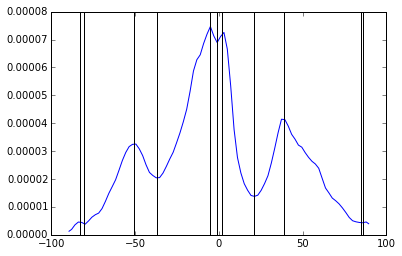

In [18]:
plt.plot(test.precip.lat.values, test.precip.mean('lon'))
for zero in zs.values:
    plt.gca().axvline(zero, color='k')

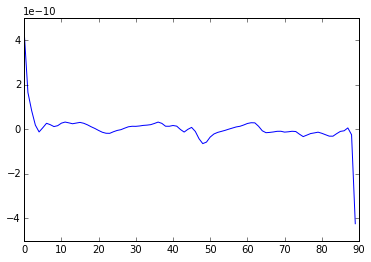

In [7]:
plt.plot(shn.d_dy_from_lat(test.precip.mean('lon'), 6.371e6, vec_field=False))

In [2]:
test = xray.open_dataset('/work/skc/itcz/am2_reyoi/am2_reyoi_extratropics_sp_SI/precip/precip.ann.ts.from_monthly_ts_pressure.am2_reyoi.am2_reyoi_extratropics_sp_SI.1983-1998.nc')

In [3]:
test.precip.get_axis_num('year')

0

In [3]:
t5 = test['precip'] - test.precip.mean()

In [4]:
t5.reset_coords(drop=True)

<xray.DataArray 'precip' (year: 16, lat: 90, lon: 144)>
array([[[ -2.54079677e-05,  -2.54080287e-05,  -2.54079118e-05, ...,
          -2.54082754e-05,  -2.54081985e-05,  -2.54082882e-05],
        [ -2.56077924e-05,  -2.56342045e-05,  -2.56704022e-05, ...,
          -2.55243400e-05,  -2.55504438e-05,  -2.55757861e-05],
        [ -2.54111244e-05,  -2.55204752e-05,  -2.56337671e-05, ...,
          -2.50730018e-05,  -2.51850301e-05,  -2.52884768e-05],
        ..., 
        [ -1.98298609e-05,  -1.97587700e-05,  -1.96967015e-05, ...,
          -2.01422271e-05,  -1.99972145e-05,  -1.98935977e-05],
        [ -1.94901834e-05,  -1.94292339e-05,  -1.93666807e-05, ...,
          -1.96638316e-05,  -1.95825484e-05,  -1.95420866e-05],
        [ -2.06272426e-05,  -2.06276508e-05,  -2.06324930e-05, ...,
          -2.06328405e-05,  -2.06272466e-05,  -2.06272502e-05]],

       [[ -2.55449084e-05,  -2.55448939e-05,  -2.55448505e-05, ...,
          -2.55451345e-05,  -2.55450642e-05,  -2.55451976e-05],
    

In [11]:
t5.get_axis_num('year')

0

In [10]:
test.reset_coords().coords

Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 -81.91 -79.89 -77.87 ...
  * year     (year) int32 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 ...

In [9]:
t5.reset_coords().coords

Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * year     (year) int32 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 ...
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 -81.91 -79.89 -77.87 ...

In [18]:
order = {coord : test.precip.get_axis_num(coord) for coord in test.precip.reset_coords().coords}

In [23]:
L = sorted(order.items(), key=lambda (k, v): v)

In [27]:
zip(*L)[0]

(u'year', u'lat', u'lon')

In [11]:
t5.values.shape

(16, 90, 144)

In [5]:
sint.interp1d_xray(t5, 'lat', 360)

<xray.DataArray (year: 16, lat: 360, lon: 144)>
array([[[ -2.54079677e-05,  -2.54080287e-05,  -2.54079118e-05, ...,
          -2.54082754e-05,  -2.54081985e-05,  -2.54082882e-05],
        [ -2.54736482e-05,  -2.54823706e-05,  -2.54941900e-05, ...,
          -2.54464248e-05,  -2.54549532e-05,  -2.54633432e-05],
        [ -2.55393288e-05,  -2.55567125e-05,  -2.55804682e-05, ...,
          -2.54845741e-05,  -2.55017079e-05,  -2.55183982e-05],
        ..., 
        [ -1.98797608e-05,  -1.98398336e-05,  -1.98003713e-05, ...,
          -1.99958319e-05,  -1.99404812e-05,  -1.99138836e-05],
        [ -2.02535017e-05,  -2.02337422e-05,  -2.02164321e-05, ...,
          -2.03143362e-05,  -2.02838639e-05,  -2.02705669e-05],
        [ -2.06272426e-05,  -2.06276508e-05,  -2.06324930e-05, ...,
          -2.06328405e-05,  -2.06272466e-05,  -2.06272502e-05]],

       [[ -2.55449084e-05,  -2.55448939e-05,  -2.55448505e-05, ...,
          -2.55451345e-05,  -2.55450642e-05,  -2.55451976e-05],
        [ -2

In [30]:
sint.interp1d_xray(test['precip'], 'lon', 40)

<xray.DataArray (year: 16, lat: 90, lon: 40)>
array([[[  1.54512533e-06,   1.54529948e-06,   1.54511208e-06, ...,
           1.54428892e-06,   1.54476867e-06,   1.54480487e-06],
        [  1.34530072e-06,   1.23034933e-06,   1.15943487e-06, ...,
           1.57805011e-06,   1.48206835e-06,   1.37730699e-06],
        [  1.54196863e-06,   1.18240282e-06,   1.00490786e-06, ...,
           2.41402715e-06,   2.08490139e-06,   1.66461623e-06],
        ..., 
        [  7.12323216e-06,   7.23564957e-06,   7.08027278e-06, ...,
           6.59576461e-06,   6.73023820e-06,   7.05949534e-06],
        [  7.46290964e-06,   7.64963842e-06,   7.82982175e-06, ...,
           6.97997136e-06,   7.23816247e-06,   7.41100642e-06],
        [  6.32585043e-06,   6.31585184e-06,   6.31047872e-06, ...,
           6.32891135e-06,   6.31547179e-06,   6.32584285e-06]],

       [[  1.40818466e-06,   1.40840075e-06,   1.40856806e-06, ...,
           1.40691862e-06,   1.40787192e-06,   1.40789551e-06],
        [  1.1

In [5]:
t2 = sint.zeros_xray(test['precip'].mean('lon') - test['precip'].mean('lat').mean('lon'), 'lat')

In [6]:
t3 = t2.dropna('lat')

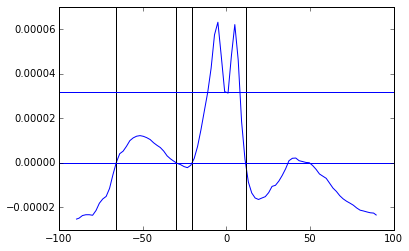

In [7]:
plt.plot(test['precip'].lat, test['precip'].mean('lon') - test['precip'].mean('lat').mean('lon'))
plt.axvline(t3[0], color='k')
plt.axvline(t3[1], color='k')
plt.axvline(t3[2], color='k')
plt.axvline(t3[3], color='k')
plt.axhline(sint.interp1d_pt_xray(test['precip'].mean('lon') - test['precip'].mean('lat').mean('lon'), 'lat', 0.0))
plt.axhline(0.0)

In [3]:
sint.interp1d_pt_xray(test['precip'].mean('lon') - test['precip'].mean('lat').mean('lon'), 'lat', 0.0)

<xray.DataArray ()>
array(3.1593605704004647e-05)
Coordinates:
    lat      float64 0.0

In [6]:
z = sint.zeros_xray(t5, 'lat', 1000)

<matplotlib.contour.QuadContourSet instance at 0x7fbb7a30c9e0>

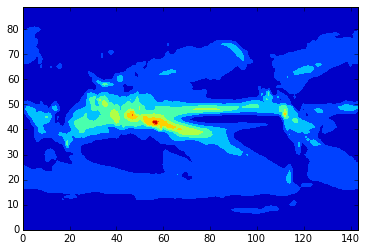

In [11]:
plt.contourf(t5[5])

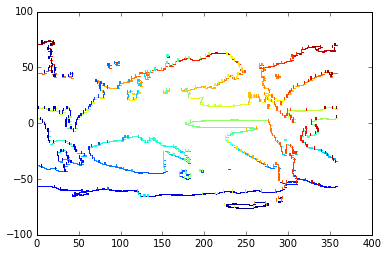

In [19]:
plt.pcolor(z.lon.values, z.lat.values, z.to_masked_array()[5])
plt.pcolor(z2.lon.values, z2.lat.values, z2.to_masked_array()[5])

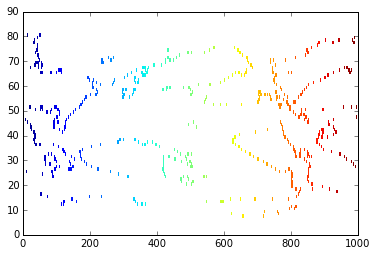

In [16]:
plt.pcolor(z2.to_masked_array()[5])

In [15]:
z2 = sint.zeros_xray(t5, 'lon', 1000)

<matplotlib.colorbar.Colorbar instance at 0x7f8b3b81cb90>

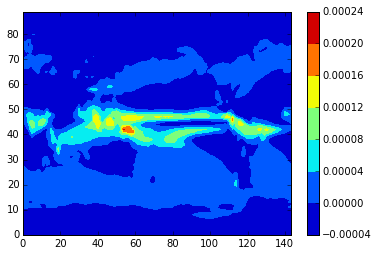

In [15]:
plt.contourf(test.precip - test.precip.mean('lon').mean('lat'))
plt.colorbar()

In [18]:
test2 = xray.open_dataset('/work/skc/itcz/am2_reyoi/am2_HadISST_control/precip/precip.06.ts.from_monthly_ts_pressure.am2_reyoi.am2_HadISST_control.1983-1998.nc')

RuntimeError: No such file or directory

In [17]:
test2

<xray.Dataset>
Dimensions:    (lat: 90, lon: 144)
Coordinates:
    sfc_area   (lon, lat) float64 2.758e+08 2.206e+09 4.41e+09 6.608e+09 ...
  * lon        (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
    land_mask  (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    zsurf      (lat, lon) float64 2.848e+03 2.848e+03 2.848e+03 2.848e+03 ...
  * lat        (lat) float64 -89.49 -87.98 -85.96 -83.93 -81.91 -79.89 ...
Data variables:
    precip     (lat, lon) float64 1.58e-06 1.58e-06 1.581e-06 1.581e-06 ...

In [29]:
pext = xray.open_dataset('/work/Spencer.Clark/itcz/am2_reyoi/am2_reyoi_tropics_u/precip_extrema_gcm/precip_extrema_gcm.ann.None.from_monthly_ts_pressure.am2_reyoi.am2_reyoi_tropics_u.1983-1998.nc')

In [32]:
pext.precip_extrema_gcm[0]

<xray.DataArray 'precip_extrema_gcm' (year: 16)>
array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])
Coordinates:
    lat      float64 -89.49
  * year     (year) int32 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 ...

-------

Energy Equator vs. ITCZ
----------------------

In [8]:
paths = {
    'Control' : '/work/skc/itcz/am2_reyoi/am2_HadISST_control',
    'Extratropics Full' : '/work/skc/itcz/am2_reyoi/am2_reyoi_extratropics_full',
    'Extratropics Mean' : '/work/skc/itcz/am2_reyoi/am2_reyoi_extratropics_u',
    'Extratropics SP' : '/work/skc/itcz/am2_reyoi/am2_reyoi_extratropics_sp_SI',
    'Tropics Full' : '/work/skc/itcz/am2_reyoi/am2_reyoi_tropics_full',
    'Tropics Mean' : '/work/skc/itcz/am2_reyoi/am2_reyoi_tropics_u',
    'Tropics SP' : '/work/skc/itcz/am2_reyoi/am2_reyoi_tropics_sp_SI',
}
names = {
    'Control' : 'am2_HadISST_control',
    'Extratropics Full' : 'am2_reyoi_extratropics_full',
    'Extratropics Mean' : 'am2_reyoi_extratropics_u',
    'Extratropics SP' : 'am2_reyoi_extratropics_sp_SI',
    'Tropics Full' : 'am2_reyoi_tropics_full',
    'Tropics Mean' : 'am2_reyoi_tropics_u',
    'Tropics SP' : 'am2_reyoi_tropics_sp_SI'
}

In [10]:
aht_gcm = {case: xray.open_dataset('%s/aht_gcm/aht_gcm.ann.av.from_monthly_ts_pressure.am2_reyoi.%s.1983-1998.nc' % (paths[case], names[case])) for case in paths}

In [34]:
# Find zeros for each case.
aht_gcm_zeros = {case: sint.zeros_xray(aht_gcm[case].aht_gcm, 'lat').dropna('lat').sel(lat=slice(-30,30)) for case in aht_gcm}

In [36]:
aht_gcm_zeros_m = {case: np.deg2rad(aht_gcm_zeros[case])*6.371e6 for case in aht_gcm}

In [16]:
d_dy_gcm = {case: shn.d_dy_from_lat(aht_gcm[case].aht_gcm, radius=6.371e6, vec_field=False) for case in aht_gcm}

In [18]:
d_dy_gcm_eq = {case: sint.interp1d_pt_xray(d_dy_gcm[case], 'lat', 0.0) for case in aht_gcm}

In [19]:
aht_gcm_eq = {case: sint.interp1d_pt_xray(aht_gcm[case].aht_gcm, 'lat', 0.0) for case in aht_gcm}

In [30]:
d_dy2_gcm = {case: shn.d_dy_from_lat(d_dy_gcm[case], radius=6.371e6, vec_field=False) for case in aht_gcm}

In [31]:
d_dy2_gcm_eq = {case: sint.interp1d_pt_xray(d_dy2_gcm[case], 'lat', 0.0) for case in aht_gcm}

In [32]:
d_dy3_gcm = {case: shn.d_dy_from_lat(d_dy2_gcm[case], radius=6.371e6, vec_field=False) for case in aht_gcm}

In [33]:
d_dy3_gcm_eq = {case: sint.interp1d_pt_xray(d_dy3_gcm[case], 'lat', 0.0) for case in aht_gcm}

In [47]:
# Try expanding out to third order.
first_order = {case: aht_gcm_eq[case] + aht_gcm_zeros_m[case]*d_dy_gcm_eq[case] for case in aht_gcm}
second_order = {case: first_order[case] + 0.5*d_dy2_gcm_eq[case]*aht_gcm_zeros_m[case]**2 for case in aht_gcm}
third_order = {case: second_order[case] + (1./6.)*d_dy3_gcm_eq[case]*aht_gcm_zeros_m[case]**3 for case in aht_gcm}

In [90]:
# Try expanding out to third order.
first_orderQ = {case: aht_gcm_eq[case] + aht_gcm_zeros_m[case]*Q_diff_eq[case] for case in aht_gcm}
second_orderQ = {case: first_orderQ[case] + 0.5*d_dy_Q_diff_eq[case]*aht_gcm_zeros_m[case]**2 for case in aht_gcm}
third_orderQ = {case: second_orderQ[case] + (1./6.)*d_dy2_Q_diff_eq[case]*aht_gcm_zeros_m[case]**3 for case in aht_gcm}

<xray.DataArray (lat: 1)>
array([ 557857.83295104])
Coordinates:
  * lat      (lat) float64 5.017

In [91]:
third_orderQ['Control'] - second_orderQ['Control']

<xray.DataArray (lat: 1)>
array([ 1019564.25])
Coordinates:
  * lat      (lat) float64 5.017

In [92]:
second_orderQ['Control'] - first_orderQ['Control']

<xray.DataArray (lat: 1)>
array([ 1335419.375])
Coordinates:
  * lat      (lat) float64 5.017

In [93]:
first_orderQ['Control'] - aht_gcm_eq['Control']

<xray.DataArray (lat: 1)>
array([-57342970.25])
Coordinates:
  * lat      (lat) float64 5.017

In [70]:
aht_gcm_eq['Control']/1e14

<xray.DataArray ()>
array(-5.722155426012892)
Coordinates:
    lat      float64 0.0

In [94]:
third_orderQ

{'Control': <xray.DataArray (lat: 1)>
 array([ -5.72215598e+14])
 Coordinates:
   * lat      (lat) float64 5.017,
 'Extratropics Full': <xray.DataArray (lat: 1)>
 array([ -3.21478153e+14])
 Coordinates:
   * lat      (lat) float64 3.505,
 'Extratropics Mean': <xray.DataArray (lat: 1)>
 array([ -4.93031963e+14])
 Coordinates:
   * lat      (lat) float64 4.778,
 'Extratropics SP': <xray.DataArray (lat: 1)>
 array([ -3.29291886e+14])
 Coordinates:
   * lat      (lat) float64 3.575,
 'Tropics Full': <xray.DataArray (lat: 1)>
 array([ -3.86212018e+14])
 Coordinates:
   * lat      (lat) float64 4.162,
 'Tropics Mean': <xray.DataArray (lat: 1)>
 array([ -4.81022990e+14])
 Coordinates:
   * lat      (lat) float64 4.689,
 'Tropics SP': <xray.DataArray (lat: 1)>
 array([ -4.10241919e+14])
 Coordinates:
   * lat      (lat) float64 4.331}

In [80]:
S_net = {case: xray.open_dataset('%s/S_net/S_net.ann.av.from_monthly_ts_pressure.am2_reyoi.%s.1983-1998.nc' % (paths[case], names[case])).mean('lon') for case in paths}
L_net = {case: xray.open_dataset('%s/L_net/L_net.ann.av.from_monthly_ts_pressure.am2_reyoi.%s.1983-1998.nc' % (paths[case], names[case])).mean('lon') for case in paths}

In [82]:
Q_diff = {case: S_net[case].S_net + L_net[case].L_net for case in aht_gcm}

In [50]:
Q_diff = {case: xray.open_dataset('%s/Q_diff/Q_diff.ann.av.from_monthly_ts_pressure.am2_reyoi.%s.1983-1998.nc' % (paths[case], names[case])).mean('lon') for case in paths}

In [84]:
Q_diff_eq = {case: sint.interp1d_pt_xray(Q_diff[case], 'lat', 0.0) for case in aht_gcm}

In [85]:
d_dy_Q_diff = {case: shn.d_dy_from_lat(Q_diff[case], radius=6.371e6, vec_field=False) for case in aht_gcm}

In [86]:
d_dy_Q_diff_eq = {case: sint.interp1d_pt_xray(d_dy_Q_diff[case], 'lat', 0.0) for case in aht_gcm}

In [87]:
d_dy2_Q_diff = {case: shn.d_dy_from_lat(d_dy_Q_diff[case], radius=6.371e6, vec_field=False) for case in aht_gcm}

In [88]:
d_dy2_Q_diff_eq = {case: sint.interp1d_pt_xray(d_dy2_Q_diff[case], 'lat', 0.0) for case in aht_gcm}

In [89]:
d_dy3_Q_diff = {case: shn.d_dy_from_lat(d_dy2_Q_diff[case], radius=6.371e6, vec_field=False) for case in aht_gcm}
d_dy3_Q_diff_eq = {case: sint.interp1d_pt_xray(d_dy3_Q_diff[case], 'lat', 0.0) for case in aht_gcm}

In [ ]:
third_orderQ = {case: second_orderQ[case] + (1./6.)*d_dy2_Q_diff_eq[case]*aht_gcm_zeros_m[case]**3 for case in aht_gcm}

In [59]:
def low_net(mv, d2, net):
    a = 6.371e6
    q = (-6.*mv/d2)
    return (1./a)*q**(1./3.) - ((2*net/d2)*q**(-2./3.))

In [61]:
tob = {case: low_net(aht_gcm_eq[case], d_dy2_Q_diff_eq[case], Q_diff_eq[case]) for case in aht_gcm}

In [62]:
tob

{'Control': <xray.DataArray ()>
 array(45.348624802850324)
 Coordinates:
     lat      float64 0.0, 'Extratropics Full': <xray.DataArray ()>
 array(37.182528525421844)
 Coordinates:
     lat      float64 0.0, 'Extratropics Mean': <xray.DataArray ()>
 array(43.08126905542176)
 Coordinates:
     lat      float64 0.0, 'Extratropics SP': <xray.DataArray ()>
 array(36.908491859060355)
 Coordinates:
     lat      float64 0.0, 'Tropics Full': <xray.DataArray ()>
 array(39.47177331813684)
 Coordinates:
     lat      float64 0.0, 'Tropics Mean': <xray.DataArray ()>
 array(43.0387078253243)
 Coordinates:
     lat      float64 0.0, 'Tropics SP': <xray.DataArray ()>
 array(39.691946736873525)
 Coordinates:
     lat      float64 0.0}

In [46]:
second_order

{'Control': <xray.DataArray (lat: 1)>
 array([ -1.49172120e+14])
 Coordinates:
   * lat      (lat) float64 5.017,
 'Extratropics Full': <xray.DataArray (lat: 1)>
 array([ -4.00030797e+13])
 Coordinates:
   * lat      (lat) float64 3.505,
 'Extratropics Mean': <xray.DataArray (lat: 1)>
 array([ -1.30875949e+14])
 Coordinates:
   * lat      (lat) float64 4.778,
 'Extratropics SP': <xray.DataArray (lat: 1)>
 array([ -4.83592557e+13])
 Coordinates:
   * lat      (lat) float64 3.575,
 'Tropics Full': <xray.DataArray (lat: 1)>
 array([ -8.74444826e+13])
 Coordinates:
   * lat      (lat) float64 4.162,
 'Tropics Mean': <xray.DataArray (lat: 1)>
 array([ -1.22612870e+14])
 Coordinates:
   * lat      (lat) float64 4.689,
 'Tropics SP': <xray.DataArray (lat: 1)>
 array([ -1.04564828e+14])
 Coordinates:
   * lat      (lat) float64 4.331}

In [27]:
thermal_eq = {case: np.rad2deg(-1. * aht_gcm_eq[case] / (d_dy_gcm_eq[case] * 6.371e6)) for case in aht_gcm}

In [29]:
print aht_gcm_zeros

{'Control': <xray.DataArray (lat: 2)>
array([-89.49438202,   5.01693602])
Coordinates:
  * lat      (lat) float64 -89.49 5.017, 'Extratropics Full': <xray.DataArray (lat: 2)>
array([-89.49438202,   3.50539137])
Coordinates:
  * lat      (lat) float64 -89.49 3.505, 'Tropics SP': <xray.DataArray (lat: 2)>
array([-89.49438202,   4.33077431])
Coordinates:
  * lat      (lat) float64 -89.49 4.331, 'Tropics Full': <xray.DataArray (lat: 2)>
array([-89.49438202,   4.16171997])
Coordinates:
  * lat      (lat) float64 -89.49 4.162, 'Extratropics SP': <xray.DataArray (lat: 2)>
array([-89.49438202,   3.57500198])
Coordinates:
  * lat      (lat) float64 -89.49 3.575, 'Extratropics Mean': <xray.DataArray (lat: 2)>
array([-89.49438202,   4.77827108])
Coordinates:
  * lat      (lat) float64 -89.49 4.778, 'Tropics Mean': <xray.DataArray (lat: 2)>
array([-89.49438202,   4.68877172])
Coordinates:
  * lat      (lat) float64 -89.49 4.689}


In [28]:
print thermal_eq

{'Control': <xray.DataArray ()>
array(7.107430267268289)
Coordinates:
    lat      float64 0.0, 'Extratropics Full': <xray.DataArray ()>
array(3.8685712166975437)
Coordinates:
    lat      float64 0.0, 'Tropics SP': <xray.DataArray ()>
array(5.659364311167946)
Coordinates:
    lat      float64 0.0, 'Tropics Full': <xray.DataArray ()>
array(5.145490419401718)
Coordinates:
    lat      float64 0.0, 'Extratropics SP': <xray.DataArray ()>
array(4.075740032368086)
Coordinates:
    lat      float64 0.0, 'Extratropics Mean': <xray.DataArray ()>
array(6.425089751488746)
Coordinates:
    lat      float64 0.0, 'Tropics Mean': <xray.DataArray ()>
array(6.209002499011119)
Coordinates:
    lat      float64 0.0}


In [25]:
0.124*180./3.14

7.10828025477707